In [1]:
import pandas as pd
from pandas import read_parquet

In [2]:
file=pd.read_parquet('/root/generic-buy-now-pay-later-project-group-23/data/tables/final_merged.parquet')

In [3]:
file.columns

Index(['user_id', 'merchant_abn', 'dollar_value', 'order_id', 'date', 'name_x',
       'address', 'state_x', 'postcode', 'consumer_id', 'name_y', 'tags',
       'revenue_levels', 'take_rate', 'SA2 code', 'State', 'SA2 name',
       'population', 'population_density', 'Sum ($)2017-18', 'Mean ($)2017-18',
       'state_y', 'state_abbrev', 'confirmed', 'confirmed_cum'],
      dtype='object')

In [4]:
drop_col = ['user_id', 'merchant_abn', 'dollar_value', 'order_id', 'date', 'name_x',
       'address', 'state_x', 'postcode', 'consumer_id', 'name_y', 'tags',
       'revenue_levels', 'SA2 code', 'State', 'SA2 name',
        'population_density', 'Sum ($)2017-18',
       'state_y', 'state_abbrev', 'confirmed_cum']

In [5]:
from sklearn.linear_model import LogisticRegression
sample = file.sample(n=1000, random_state=2020,replace=True)

In [6]:
import numpy as np

In [7]:
x = sample['take_rate'].values.reshape(-1, 1)
y = sample['Mean ($)2017-18'].values.reshape(-1, 1)
z = sample['population'].values.reshape(-1, 1)
zz = sample['confirmed'].values.reshape(-1, 1)
model = LogisticRegression(max_iter=1000).fit(x,y)
model2 = LogisticRegression(max_iter=1000).fit(x,zz)
model1 = LogisticRegression(max_iter=1000).fit(x,z)

/root/miniconda3/envs/ads/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/miniconda3/envs/ads/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/miniconda3/envs/ads/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
model.score(x,y)


0.015

In [9]:
model1.score(x,z)

0.015

In [10]:
model2.score(x,zz)

0.318

In [12]:
import scipy.stats as stats
import statsmodels.api as sm


In [13]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
#clf = LogisticRegression(random_state=0).fit(takerate, file['population'])

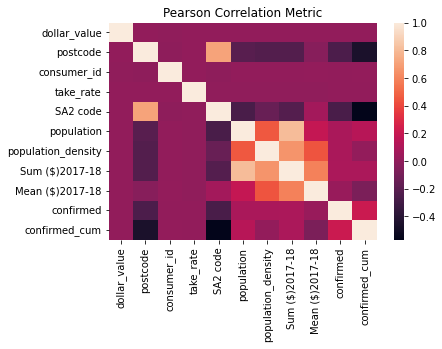

In [14]:
sample = file.sample(n=10000, random_state=2020,replace=True)
sns.heatmap(file.corr())
plt.title('Pearson Correlation Metric')
plt.show()

In [15]:
sample['mean']= np.log(sample['Mean ($)2017-18'])


/root/miniconda3/envs/ads/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
sample['Mean ($)2017-18']

1765768    54357.0
1482051    51870.0
1948278    64579.0
542811     49311.0
1508989    57449.0
            ...   
2489167    48546.0
2381137    74589.0
1889571    71182.0
421482     70712.0
1877443    52075.0
Name: Mean ($)2017-18, Length: 10000, dtype: float64

In [17]:
sample['mean1']=sample['Mean ($)2017-18']

In [18]:
sample['mean']=np.log(sample['Mean ($)2017-18'])
sample['mean']

/root/miniconda3/envs/ads/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1765768    10.903329
1482051    10.856496
1948278    11.075645
542811     10.805902
1508989    10.958653
             ...    
2489167    10.790267
2381137    11.219748
1889571    11.172995
421482     11.166371
1877443    10.860440
Name: mean, Length: 10000, dtype: float64

In [19]:
sample['take_rate']

1765768    6.00
1482051    1.87
1948278    6.16
542811     6.83
1508989    2.93
           ... 
2489167    3.25
2381137    3.15
1889571    2.86
421482     2.93
1877443    2.52
Name: take_rate, Length: 10000, dtype: float64

In [21]:
fitter = ols(
    formula= "take_rate ~ C(mean)+population+confirmed",
    data = sample
).fit()   

In [22]:
print(fitter.summary())

                            OLS Regression Results                            
Dep. Variable:              take_rate   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9682
Date:                Thu, 15 Sep 2022   Prob (F-statistic):              0.767
Time:                        15:03:11   Log-Likelihood:                -19080.
No. Observations:                9996   AIC:                         4.055e+04
Df Residuals:                    8800   BIC:                         4.918e+04
Df Model:                        1195                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [24]:
anova_table = sm.stats.anova_lm(fitter, typ=2)

In [25]:
anova_table

,sum_sq,df,F,PR(>F)
C(mean),3499.228531,1193.0,0.969456,0.757108
population,0.428620,1.0,0.141667,0.706638
confirmed,1.614954,1.0,0.533773,0.465044
Residual,26624.799962,8800.0,NaN,NaN
